In [89]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from matplotlib import pyplot as plt

np.random.seed(42)

def merge_labels(label):
  asian_countries = ["China", "Japan", "South Korea", "Taiwan", "Hong Kong"]
  if label in asian_countries:
    return "Asia"
  return label

df = pd.read_csv('embeddings_namesreplaced.csv')

meta_df = df[["name", "nationality", "text", "date"]]
embeddings = df.drop(["name", "nationality", "text", "date"], axis = 1).values

nationalities = df['nationality']
classes = nationalities.map(merge_labels)

# create a new column in the dataframe to store the category (asia, usa) labels
meta_df['category'] = classes

C:\Users\dtkim\AppData\Local\Temp\ipykernel_15512\3175260278.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df['category'] = classes


In [90]:
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

In [ ]:
num_clusters = 25
cluster = KMeans(n_clusters = num_clusters,
          init = "k-means++", 
          n_init = "auto", 
          max_iter = 30000, 
          algorithm = "lloyd",
          )

# perform clustering
cluster.fit(embeddings_scaled)

# get the cluster labels assigned to each data point
cluster_labels = cluster.labels_
# create a new column in the dataframe to store the cluster labels
meta_df['cluster'] = cluster_labels

C:\Users\dtkim\AppData\Local\Temp\ipykernel_15512\1612722126.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df['cluster'] = cluster_labels


In [92]:
df = pd.concat([meta_df, pd.DataFrame(embeddings_scaled)], axis=1)

lb = LabelBinarizer()
labels = lb.fit_transform(classes)
labels = labels.reshape(labels.size,)

X_train, X_test, y_train, y_test = train_test_split(df, labels)
features_train = X_train.drop(["name", "nationality", "text", "date", "category", "cluster"], axis = 1).values
features_test = X_test.drop(["name", "nationality", "text", "date", "category", "cluster"], axis = 1).values
scaler = StandardScaler()
ft_scaled_train = scaler.fit_transform(features_train)
scaler = StandardScaler()
ft_scaled_test = scaler.fit_transform(features_test)

model = LogisticRegression(random_state=0)
model.fit(ft_scaled_train, y_train)
y_pred = model.predict(ft_scaled_test)
print(classification_report(y_test, y_pred, target_names=lb.classes_))

classification_vals = np.array([x + 2*y for x, y in zip(y_pred, y_test)])

tp = np.array(np.where(classification_vals == 3)).tolist()[0]
fp = np.array(np.where(classification_vals == 1)).tolist()[0]
tn = np.array(np.where(classification_vals == 0)).tolist()[0]
fn = np.array(np.where(classification_vals == 2)).tolist()[0]

pd.set_option('display.max_colwidth', None)
display(X_test[["name", "nationality", "text", "cluster"]].iloc[tn])
# display(X_test[["name", "nationality", "text"]].iloc[fn])
# display(X_test[["name", "nationality", "text"]].iloc[tp])
# display(X_test[["name", "nationality", "text"]].iloc[fp].tail(50))

               precision    recall  f1-score   support

         Asia       0.35      0.07      0.11       200
United States       0.99      1.00      0.99     15749

     accuracy                           0.99     15949
    macro avg       0.67      0.53      0.55     15949
 weighted avg       0.98      0.99      0.98     15949



,name,nationality,text,cluster
253,Hideki Kuriyama,Japan,I just wanted to ask you: Can you tell us exactly how you feel now?,2
628,Kazuhiro Sasaki,Japan,"What differences have you found in the culture between here and Japan, and also the\r\nbehavior of the fans?",5
396,Daisuke Matsuzaka,Japan,"In the first inning, you got some balls called outside, and it was a tough inning for you, but how did you transition mentally going into the second inning after which you seemed to settle down a bit?",0
482,Shohei Ohtani,Japan,"You came to the States six years ago with the goal of playing in the big leagues but ultimately to play in the World Series. Now that you have that opportunity, what are the emotions that you're feeling to play in the World Series now?",0
359,Hideki Matsui,Japan,"I wonder if you could put into some perspective, it's very difficult for a Japanese playing to get here, play ten years in Japan and come to a new culture, and I'm sure you thought you'd win a championship before this. What does this journey feel like and how do you feel right now?",0
176,Yu Darvish,Japan,I'm sure you experienced those kind of playoffs type of games in Japan and here before. So like what is the important thing for you to pitch in this kind of game?,2
152,Yu Darvish,Japan,"About the pitch selection, you started using the cutter, because you started throwing more cutters, that makes your four-seamer slider better, but how did you feel about your pitch selection?",0
383,Kaz Matsui,Japan,You were a huge star playing in Japan. Is this the first time you felt like you were in that big spotlight again for the first time in the United States playing baseball?,0
613,Hyun-Jin Ryu,South Korea,"Do you think it can help motivate you and maybe provide a little bit of extra energy knowing what an important game this is for your homeland and the number of people who will be watching, and how significant it is to have a South Korean pitcher start a Postseason game?",0
465,Kazuma Okamoto,Japan,"Two things: This team, of course I think this team will be go separate ways tomorrow, so how do you feel about that? The other question is, I wanted to ask you, tell me, how did you feel when you hit the home run?",2


In [133]:
df_tn = X_test[["name", "nationality", "text", "cluster"]].iloc[tn]

display(df_tn[df_tn["cluster"] == 2])

,name,nationality,text,cluster
253,Hideki Kuriyama,Japan,I just wanted to ask you: Can you tell us exactly how you feel now?,2
176,Yu Darvish,Japan,I'm sure you experienced those kind of playoffs type of games in Japan and here before. So like what is the important thing for you to pitch in this kind of game?,2
465,Kazuma Okamoto,Japan,"Two things: This team, of course I think this team will be go separate ways tomorrow, so how do you feel about that? The other question is, I wanted to ask you, tell me, how did you feel when you hit the home run?",2
149,Yu Darvish,Japan,"First of all, congratulations. You pitched great today for five innings. How did you feel about today's outing?",2


In [131]:
df_fn = X_test[["name", "nationality", "text", "cluster"]].iloc[fn]

display(df_fn[df_fn["cluster"] == 2])

,name,nationality,text,cluster
11272,Gerrit Cole,United States,"Last time you pitched, it seemed like the Royals were sitting the fastball against you. Does that change your approach with how you sequence your fastballs or anything like that?",2
21583,Tyler Glasnow,United States,How does it feel to come back this season and mentally like you're going to play the postseason and also you have a big role with this team. How do you feel about everything?,2
51806,Jered Weaver,United States,"Jered, you got a chance to pitch for team U.S.A. and the NCAA tournament. Do you think that experience helps you with the pressure you're facing tomorrow?",2
62087,C.J. Wilson,United States,There's a perception that your value as a free agent this offseason will go up or down dependent on how you pitch in postseason. How do you feel about that?,2


In [132]:
display(meta_df[meta_df["cluster"] == 2].sample(25))

,name,nationality,text,date,category,cluster
18292,Max Fried,United States,"I asked you about your friends the other day. How about just <PN>, specifically, what have those conversations been like over the last week?","October 20, 2021",United States,2
27585,Brandon Inge,United States,"You had a little bit of a long road back from your knee surgeries. You were playing, but just to get back to feeling like you were before. How are you feeling at this point of the year? I know there was a game a couple of days ago where it seemed like you were making plays that looked a little bit more how you were before the surgery. Are you feeling health-wise like you did before the operations?","October 12, 2011",United States,2
2223,Austin Jackson,United States,"This is for both of you: After one of the games in the ALCS <PN> talked about, we know what the Tigers' pitching are doing to us, we have to make the adjustments. Now the roles are reversed. Do you see adjustments that could be made the way they're pitching to you guys?","October 26, 2012",United States,2
51492,Clarke Schmidt,United States,"Can you talk about it seemed like you retied 13 of the first 16, and then three batters, it just kind of spiraled. What happened?","October 9, 2024",United States,2
48567,Dave Roberts,United States,"Back to what you said to the team, I'm just wondering, obviously the decision with <PN> to go Game 2 is so momentous. Did you feel a need or did you say anything to the team explaining anything about that to them or was that just you, <PN>, and <PN>? You kept it between you?","October 4, 2018",United States,2
24691,Rich Hill,United States,I know the first thing people will ask you is about your finger; is it in good condition for tomorrow? And the pitcher that is pitching tomorrow for Houston is very tough. Is it good enough to throw a few curves?,"October 24, 2017",United States,2
6354,Barry Bonds,United States,"You seem to be back to your measured self today, but last night you seemed to show a little excitement. Was there some excitement last night?","October 5, 2001",United States,2
53731,John Smoltz,United States,You've obviously had a lot more post-season success than <PN> has. Is there still\r\nsome kind of a mystique about going up against him at this point in the year?,"October 26, 1999",United States,2
20813,Joe Girardi,United States,"You've never been in a situation this season where it's win or go home; what's your feeling tomorrow, given the way you've played the first four games?","October 19, 2010",United States,2
16109,Doug Fister,United States,This has nothing to do with pitching mechanics. It's very commonplace in this era for pitchers as they leave the field to an ovation to really not express any kind of recognition. You chose tonight to acknowledge the crowd and you did it a couple of times. Can you get a little thought behind your philosophy there?,"October 11, 2011",United States,2


In [95]:
def quick_info(data):
  print(f"size: {len(data)}")
  # calculate the frequency of each cluster in the category
  label_freq = data['cluster'].value_counts()
  label_proportions = label_freq / len(data)
  print(label_freq)
  # print the frequencies of the clusters in the category
  print(label_proportions)

quick_info(X_test[["name", "nationality", "text", "cluster"]].iloc[tn])

size: 13
cluster
0    8
2    4
5    1
Name: count, dtype: int64
cluster
0    0.615385
2    0.307692
5    0.076923
Name: count, dtype: float64


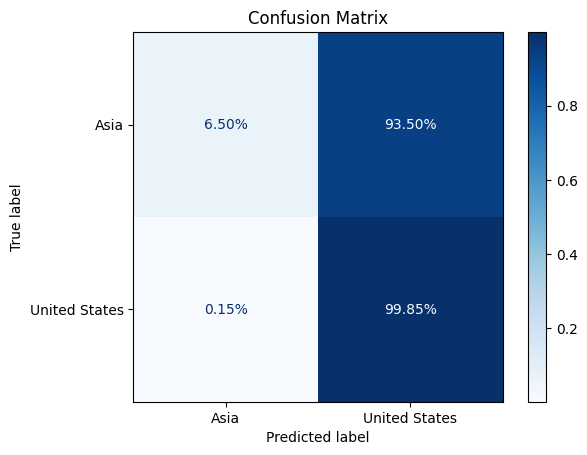

In [96]:
confusion = confusion_matrix(y_test, y_pred)
confusion = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]

disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=lb.classes_)
# fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, values_format='.2%')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [97]:
def info_by_category(category, data):
  print(f"category {category}:")
  # filter the dataframe based on the category label
  category_data = data[data['category'] == category]
  print(f"size: {len(category_data)}")
  # calculate the frequency of each cluster in the category
  label_freq = category_data['cluster'].value_counts()
  label_proportions = label_freq / len(category_data)
  print(label_freq)
  # print the frequencies of the clusters in the category
  print(label_proportions)

def info_by_cluster(cluster_id, data):
  print(f"cluster {cluster_id}:")
  # filter the dataframe based on the cluster label
  cluster_data = data[data['cluster'] == cluster_id]
  print(f"size: {len(cluster_data)}")
  # calculate the frequency of each department name in the cluster
  label_freq = cluster_data['category'].value_counts()
  label_proportions = label_freq / len(cluster_data)
  # print the frequencies of the categories in the cluster
  print(label_freq)
  print(label_proportions)

In [98]:
# get info for each category
info_by_category("United States", meta_df)
info_by_category("Asia", meta_df)

category United States:
size: 62966
cluster
5    10956
4    10884
2    10751
0    10227
6     9009
3     4888
1     4751
7     1500
Name: count, dtype: int64
cluster
5    0.173999
4    0.172855
2    0.170743
0    0.162421
6    0.143077
3    0.077629
1    0.075453
7    0.023822
Name: count, dtype: float64
category Asia:
size: 828
cluster
0    204
2    197
5    179
4    111
6     60
3     40
1     29
7      8
Name: count, dtype: int64
cluster
0    0.246377
2    0.237923
5    0.216184
4    0.134058
6    0.072464
3    0.048309
1    0.035024
7    0.009662
Name: count, dtype: float64


In [99]:
# silhouette_avg = silhouette_score(embeddings_scaled, cluster_labels)
# print(silhouette_avg)

In [100]:
# get info for each cluster
for cluster_id in range(num_clusters):
  info_by_cluster(cluster_id, meta_df)

cluster 0:
size: 10431
category
United States    10227
Asia               204
Name: count, dtype: int64
category
United States    0.980443
Asia             0.019557
Name: count, dtype: float64
cluster 1:
size: 4780
category
United States    4751
Asia               29
Name: count, dtype: int64
category
United States    0.993933
Asia             0.006067
Name: count, dtype: float64
cluster 2:
size: 10948
category
United States    10751
Asia               197
Name: count, dtype: int64
category
United States    0.982006
Asia             0.017994
Name: count, dtype: float64
cluster 3:
size: 4928
category
United States    4888
Asia               40
Name: count, dtype: int64
category
United States    0.991883
Asia             0.008117
Name: count, dtype: float64
cluster 4:
size: 10995
category
United States    10884
Asia               111
Name: count, dtype: int64
category
United States    0.989905
Asia             0.010095
Name: count, dtype: float64
cluster 5:
size: 11135
category
United St

In [101]:
display(meta_df[["name", "nationality", "text", "cluster"]].iloc[fn])

,name,nationality,text,cluster
344,Kenta Maeda,Japan,"Because of the rainout, has your schedule changed at all?",5
504,Shohei Ohtani,Japan,"When you guys reflect on how you all won yesterday, do you have to kind of use that as a blueprint as you guys prepare for tomorrow's game, everything from just the quality of at-bats, hits up and down the lineup, just how you guys won that game?",0
1719,Jake Arrieta,United States,Were you aware that you had a no-hitter going or was it even something that crossed your mind?,5
1947,Mark Attanasio,United States,We talked to <PN> about the storylines of how much <PN> would have enjoyed (indiscernible). Do you have any reflection or thoughts on that from with your time there as an owner?,2
2702,Dusty Baker,United States,"What have you seen from <PN>'s swings in this round, maybe a little different from especially the division series, and at times during the year when he was quiet how did he turn things around quickly, in your mind?",0
3348,Dusty Baker,United States,Just two real quick: Who is pitching for you tomorrow?,4
3487,Dusty Baker,United States,"Dusty, <PN> has a unique wind-up. I was just wondering if you have ever seen anything like that before or if he reminds you of anyone in the past?",6
3602,Dusty Baker,United States,"With the conditions that you were just referencing, the wind coming in, the rain, when you see the ball come off <PN>'s bat, you think, what?",0
3952,Dusty Baker,United States,We know how much you grind and how much you want to get to this moment. So what's the emotion today just a couple of hours before what's going to be the biggest game of the season so far?,4
4061,Dusty Baker,United States,"Obviously, <PN> in that last homestand last week started to swing the bat a lot better. What was it other than the pain in his hand going down over that last several weeks that allowed him to get his stroke back, and is he where he needs to be for this series?",6


In [ ]:
import os
# get unique categories from the DataFrame
categories = meta_df['category'].unique()

# define colors for each category
category_colors = plt.cm.tab10(np.linspace(0, 4, len(categories)))

# output directory for saving plots
output_dir = 'cluster_plots_unlabeled'
os.makedirs(output_dir, exist_ok=True)  # Create the output directory if it doesn't exist

df = pd.concat([meta_df, pd.DataFrame(embeddings_scaled)], axis=1)

# plot the clusters

pca = PCA(2)
pcs = pca.fit_transform(embeddings_scaled)

plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(pcs[:, 0], pcs[:, 1], c=cluster.labels_, cmap='viridis', edgecolor='k', alpha=0.6)

plt.title('K-means Clustering with PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
# plt.grid(True)
plt.show()


# plot each cluster separately
for cluster_label in range(num_clusters):
    # create a new plot for each cluster
    plt.figure(figsize=(8, 6))
    
    # filter data for the current cluster
    cluster_data = df[df['cluster'] == cluster_label]
    embeddings = cluster_data.drop(["name", "nationality", "text", "date", "category", "cluster"], axis = 1).values
    pca = PCA(2)
    pcs = pca.fit_transform(embeddings)
    original_categories = cluster_data['category'].tolist()
    
    # plot points for the current cluster
    for category, color in zip(["United States", "Asia"], category_colors):
        category_mask = np.array(original_categories) == category
        category_embeddings = pcs[category_mask]
        plt.scatter(category_embeddings[:, 0], category_embeddings[:, 1], color=color, label=f'{category}')
    
    # add title and labels
    plt.title(f'Cluster {cluster_label}')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    
    # save plot as png file
    output_path = os.path.join(output_dir, f'8_cluster_{cluster_label}.png')
    plt.grid(True)
    plt.savefig(output_path, bbox_inches='tight', dpi=150)  # adjust dpi for higher quality if needed
    plt.close()